# Task 2 Team

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.options.plotting.backend = "plotly"
from IPython.display import Image

reading in the needed data 

In [2]:
cases = pd.read_csv("../../../data/stage_2/covid_confirmed_usafacts.csv")
deaths =  pd.read_csv("../../../data/stage_2/covid_deaths_usafacts.csv")
population_perCounty = pd.read_csv("../../../data/stage_2/covid_county_population_usafacts.csv")
country_compare = pd.read_csv("../../../data/stage_2/owid-covid-data (1).csv")

Dropping the rows with just the states. 

In [3]:
deaths = deaths.drop(deaths.index[deaths['countyFIPS'] == 0])
cases = cases.drop(cases.index[cases['countyFIPS'] == 0])
cases = cases.drop(cases.iloc[:, 0:44], axis=1)
deaths = deaths.drop(deaths.iloc[:, 0:44], axis=1)


In [4]:
cases.head()

,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1,0,0,0,0,0,0,0,0,0,0,...,7694,7694,7788,7818,7854,7890,7931,7931,7931,8061
2,0,0,0,0,0,0,0,0,0,0,...,26822,26822,27477,27736,28020,28358,28629,28629,28629,29234
3,0,0,0,0,0,0,0,0,0,0,...,2585,2585,2629,2649,2681,2699,2732,2732,2732,2761
4,0,0,0,0,0,0,0,0,0,0,...,2973,2973,3016,3034,3056,3069,3095,3095,3095,3129
5,0,0,0,0,0,0,0,0,0,0,...,7542,7542,7603,7631,7658,7696,7758,7758,7758,7833


In [5]:
deaths.head()

,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1,0,0,0,0,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,114,114
2,0,0,0,0,0,0,0,0,0,0,...,330,330,330,332,338,342,344,344,344,347
3,0,0,0,0,0,0,0,0,0,0,...,63,63,63,63,64,64,65,65,65,65
4,0,0,0,0,0,0,0,0,0,0,...,66,66,66,66,67,67,67,67,67,67
5,0,0,0,0,0,0,0,0,0,0,...,140,140,140,140,140,140,140,140,140,141


For every column in the cases, we are creating a column in new_cases that is the result of the column - the one before it. Allowing us to get the new cases. 

In [6]:

new_cases = pd.DataFrame()

for column in range(1,533):
  new_cases[column] = cases.iloc[:,column] - cases.iloc[:,column-1] 


week_cases = pd.DataFrame()

new_cases

,1,2,3,4,5,6,7,8,9,10,...,523,524,525,526,527,528,529,530,531,532
1,0,0,0,0,0,0,0,0,0,0,...,0,0,94,30,36,36,41,0,0,130
2,0,0,0,0,0,0,0,0,0,0,...,0,0,655,259,284,338,271,0,0,605
3,0,0,0,0,0,0,0,0,0,0,...,0,0,44,20,32,18,33,0,0,29
4,0,0,0,0,0,0,0,0,0,0,...,0,0,43,18,22,13,26,0,0,34
5,0,0,0,0,0,0,0,0,0,0,...,0,0,61,28,27,38,62,0,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,18,6,13,0,0
3189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,43,0,11,30,24,0,0
3190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,40,0,5,16,34,0,0
3191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,8,0,2,8,-1,0,0


Now we are grouping 7 columns and getting their sum to get the total number of new cases that week

In [7]:

                                           

week_cases = new_cases.groupby([[i//7 for i in range(1, 533)]], axis = 1).sum()

#counter = 0;
#for column in range(82,87):
#    week_cases[column] = cases.iloc[:,counter]
#    counter += 1
week_cases

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
1,0,0,0,6,6,7,8,10,11,26,...,26,3,18,37,48,72,174,101,237,130
2,0,1,2,12,19,37,43,47,26,35,...,94,77,98,224,535,1008,1755,1257,1807,605
3,0,0,0,0,2,8,10,13,12,14,...,0,-1,3,18,29,40,89,62,147,29
4,0,0,0,0,7,9,12,10,4,4,...,12,1,7,9,25,74,118,54,122,34
5,0,0,0,5,5,3,8,13,6,4,...,20,22,21,35,76,85,214,144,216,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,0,0,1,4,2,3,0,1,1,...,41,52,59,45,49,58,58,58,71,0
3189,0,0,2,12,25,17,6,2,3,0,...,3,4,1,14,19,33,29,63,108,0
3190,0,0,0,0,2,2,2,0,0,1,...,4,13,6,8,6,37,42,84,95,0
3191,0,0,0,1,3,1,0,0,0,0,...,1,1,1,2,4,10,2,5,17,0


Repeating the steps above for the deaths 

In [8]:
new_deaths = pd.DataFrame()

for column in range(1,533):
  new_deaths[column] = deaths.iloc[:,column] - deaths.iloc[:,column-1] 


week_deaths = pd.DataFrame()



In [9]:
week_deaths = new_deaths.groupby([[i//7 for i in range(1, 533)]], axis = 1).sum()

#counter = 0;
#for column in range(82,87):
#    week_deaths[column] = deaths.iloc[:,counter]
#    counter += 1
#week_deaths

getting average of the new cases per week for the entire country 

In [10]:
avg_cases = pd.DataFrame

avg_cases= pd.DataFrame(week_cases.mean(axis=0).round())

avg_cases.columns = ['Cases_avg']
avg_cases


,Cases_avg
0,0.0
1,1.0
2,9.0
3,33.0
4,61.0
...,...
72,85.0
73,170.0
74,228.0
75,279.0


getting average new deaths per week for the entire country  

In [11]:
avg_deaths = pd.DataFrame

avg_deaths = pd.DataFrame(week_deaths.mean(axis=0).round())

avg_deaths.columns = ['Deaths_avg']
avg_deaths

,Deaths_avg
0,0.0
1,0.0
2,0.0
3,1.0
4,2.0
...,...
72,1.0
73,1.0
74,1.0
75,1.0


Merging the two tables

In [12]:
# US Averages
merged_avg = avg_cases.join(avg_deaths)
merged_avg

,Cases_avg,Deaths_avg
0,0.0,0.0
1,1.0,0.0
2,9.0,0.0
3,33.0,1.0
4,61.0,2.0
...,...,...
72,85.0,1.0
73,170.0,1.0
74,228.0,1.0
75,279.0,1.0


Getting descriptors 

In [13]:
merged_avg.mean(axis=0)

Cases_avg     148.870130
Deaths_avg      2.532468
dtype: float64

In [14]:
merged_avg.mode(axis=0)

,Cases_avg,Deaths_avg
0,48.0,2.0
1,49.0,NaN
2,61.0,NaN
3,92.0,NaN
4,124.0,NaN
5,132.0,NaN
6,146.0,NaN


In [15]:
merged_avg.median(axis=0)

Cases_avg     107.0
Deaths_avg      2.0
dtype: float64

In [16]:
merged_avg.describe()

,Cases_avg,Deaths_avg
count,77.000000,77.000000
mean,148.870130,2.532468
std,132.462244,1.895871
min,0.000000,0.000000
25%,61.000000,1.000000
50%,107.000000,2.000000
75%,164.000000,3.000000
max,538.000000,7.000000


Team, task 3

In [17]:
all_countries = country_compare[['location', 'date', 'new_cases', 'new_deaths']].groupby('location')
chunks = dict(list(all_countries))
bangladesh = chunks['Bangladesh']
bangladesh = bangladesh.drop(['location', 'date'], axis=1)
brazil = chunks['Brazil']
brazil = brazil.drop(brazil.index[0:6],0)
brazil = brazil.drop(['location', 'date'], axis=1)
indonesia = chunks['Indonesia']
indonesia =  indonesia.drop(indonesia.index[0:1],0)
indonesia = indonesia.drop(['location', 'date'], axis=1)
nigeria = chunks['Nigeria']
nigeria =  nigeria.drop(nigeria.index[0:4],0)
nigeria = nigeria.drop(['location', 'date'], axis=1)
pakistan = chunks['Pakistan']
pakistan =  pakistan.drop(pakistan.index[0:7],0)
pakistan = pakistan.drop(['location', 'date'], axis=1)



In [18]:
indonesia

,new_cases,new_deaths
1071,0.0,NaN
1072,0.0,NaN
1073,0.0,NaN
1074,2.0,NaN
1075,0.0,NaN
...,...,...
1598,24709.0,1466.0
1599,30788.0,1432.0
1600,28598.0,1270.0
1601,20813.0,1222.0


In [19]:
bangladesh = bangladesh.T
brazil = brazil.T
indonesia = indonesia.T
nigeria = nigeria.T
pakistan = pakistan.T

In [20]:
bangladesh_weeks = pd.DataFrame()
bangladesh_weeks = bangladesh.groupby([[i//7 for i in range(1, 533)]], axis = 1).sum()
bangladesh_weeks = bangladesh_weeks.T

brazil_weeks = pd.DataFrame()
brazil_weeks = brazil.groupby([[i//7 for i in range(1, 533)]], axis = 1).sum()
brazil_weeks = brazil_weeks.T

indonesia_weeks = pd.DataFrame()
indonesia_weeks = indonesia.groupby([[i//7 for i in range(1, 533)]], axis = 1).sum()
indonesia_weeks = indonesia_weeks.T

nigeria_weeks = pd.DataFrame()
nigeria_weeks = nigeria.groupby([[i//7 for i in range(1, 533)]], axis = 1).sum()
nigeria_weeks = nigeria_weeks.T

pakistan_weeks = pd.DataFrame()
pakistan_weeks = pakistan.groupby([[i//7 for i in range(1, 533)]], axis = 1).sum()
pakistan_weeks = pakistan_weeks.T

In [21]:
pakistan_weeks

,new_cases,new_deaths
0,1.0,0.0
1,130.0,0.0
2,739.0,6.0
3,842.0,15.0
4,2049.0,32.0
...,...,...
72,16719.0,237.0
73,31249.0,414.0
74,31925.0,456.0
75,30459.0,560.0


Normalizing

In [22]:
# US Normalizing
merged_avg['Cases_avg'] = merged_avg['Cases_avg'].apply(lambda x: x/(332639104000))
merged_avg['Deaths_avg'] = merged_avg['Deaths_avg'].apply(lambda x: x/(332639104000))
# Bangladesh Normalizing
bangladesh_weeks['new_cases'] = bangladesh_weeks['new_cases'].apply(lambda x: x/(162650848000
))
bangladesh_weeks['new_deaths'] = bangladesh_weeks['new_deaths'].apply(lambda x: x/(162650848000))
# Bangladesh Normalizing
brazil_weeks['new_cases'] = brazil_weeks['new_cases'].apply(lambda x: x/(211715968000
))
brazil_weeks['new_deaths'] = brazil_weeks['new_deaths'].apply(lambda x: x/(211715968000))
# Bangladesh Normalizing
indonesia_weeks['new_cases'] = indonesia_weeks['new_cases'].apply(lambda x: x/(267026368000
))
indonesia_weeks['new_deaths'] = indonesia_weeks['new_deaths'].apply(lambda x: x/(267026368000))
# Nigeria Normalizing
nigeria_weeks['new_cases'] = nigeria_weeks['new_cases'].apply(lambda x: x/(214028304000
))
nigeria_weeks['new_deaths'] = nigeria_weeks['new_deaths'].apply(lambda x: x/(214028304000))
# Pakistan Normalizing
pakistan_weeks['new_cases'] = pakistan_weeks['new_cases'].apply(lambda x: x/(233500640000
))
pakistan_weeks['new_deaths'] = pakistan_weeks['new_deaths'].apply(lambda x: x/(233500640000))

Plotting

## US Plot Analysis

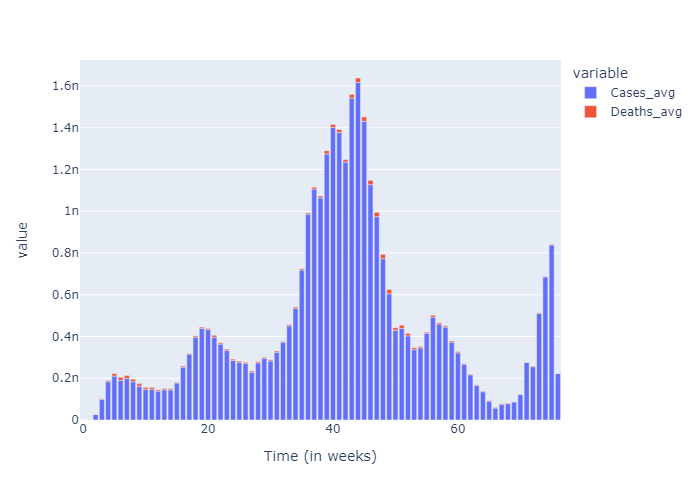

In [23]:
# US Plot
merged_avg.index.names = ['Time (in weeks)']
fig = merged_avg.plot(kind='bar')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The graph above starts at the week of March 2, 2020. The peek cases and deaths happen around the 40th week mark. These are the weeks that occur during december, with the absolute highest peek being the week of January 4th 2021. This week being the highest can correlate to christmas and elevated family celebrations. As the date is two weeks after the holidays, the virus at this point was most likely starting to show symptoms and more people were getting tested. There is also a reletively high peak of new cases in weeks 73-75. This was during the time the delta varient swept the country, it is to note though that the amount of new deaths did not rise with the amount of new cases, this can potentially be corelated to the introduction of vaccines into the population

## Bangladesh Plot Analysis

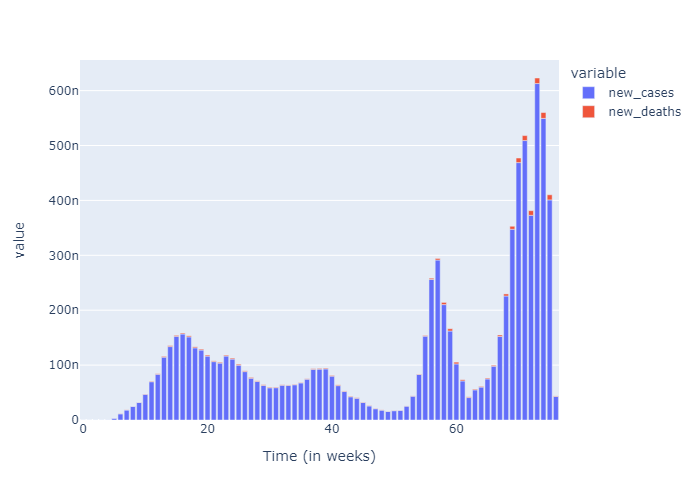

In [24]:
# Bangladesh Plot
bangladesh_weeks.index.names = ['Time (in weeks)']
fig = bangladesh_weeks.plot(kind='bar')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

When analyzing covid cases/deaths between the United States and Bangladesh it seems as if the two countries had trends that similarily aligned more in 2021 than 2020. For example, the United States had a massive surge in cases throughout the winter/holiday months of 2020, which were more than likely caused by holiday gatherings and celebrations. In contrast, Bangladesh saw a decrease in cases from late November of 2020 to January of 2021. One primary factor of this could be due to the fact that Thanksgiving and Christmas are not celebrated in Bangladesh. Similarily, both the United States and Bangladesh both saw a slight surge in cases during months of March-April of 2021. Independence Day of Bangladesh is celebrated on March 26th, perhaps this could have been a major cause. Jumu'atul-Wida is also celebrated in Bangaldesh during the month of April. Perhaps the holiday led to many religious gatherings. The surge could have also been caused by a pause in the roll-out of the Astra-Zeneca vaccine. Both countries saw a rise in cases during the summer delta surge of 2021 that seemed to peak during the months of July/August. On a side note, testing availability could also have been less available in Bangladesh than in the United States throughout the entirety of the pandemic.

## Brazil Plot Analysis

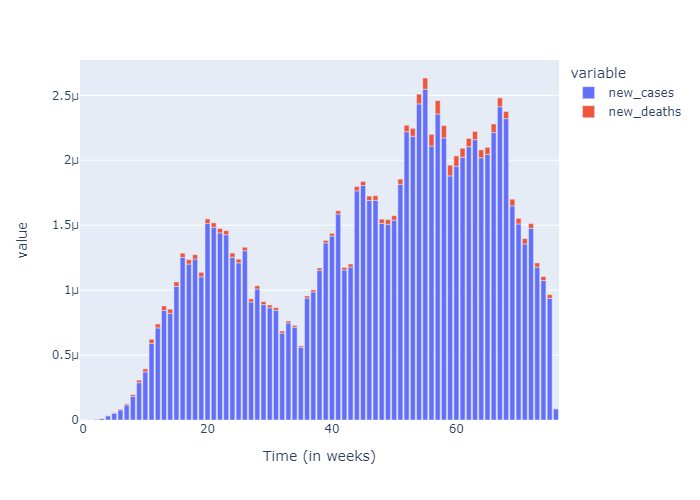

In [25]:
# Brazil Plot
brazil_weeks.index.names = ['Time (in weeks)']
fig = brazil_weeks.plot(kind='bar')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From the data we can identify three noticeable peaks of COVID19 cases in Brazil that take place within a 1 year span of the first peak at week 20, the week of Monday July 20, 2020. According to the article at this link, https://reliefweb.int/report/brazil/brazil-operation-covid-19-response-july-2020-enpt, "several cities started a loosening process of gradual reopening, which caused a new increase of cases in several locations." As we move to week 35 (November 2, 2020) the number of cases reaches (what will become) Brazil's lowest point of new reported cases to date. The next highest peak, at week 45 (January 11, 2021), is likely due "to a relaxation of social distancing and lockdown measures, as well as super-spreader events such as last month’s municipal elections and the return of crowded live events" (https://www.aljazeera.com/news/2020/12/15/covid-cases-skyrocket-in-brazil-with-no-vaccine-start-date). Around the discovery of the Delta Variant, as well as Carnaval celebrations around late-February-early-March, Brazil experiences another surge around week 55 (March 22, 2021) which is likely related to people's vulnerability to the new variant, and the increased exposure due to Carnaval festivities. Cases and deaths remained high all throughout March 2021 to May 2021. High amounts of deaths were likely related to the strain of hopsital utilization.

## Indonesia Plot Analysis

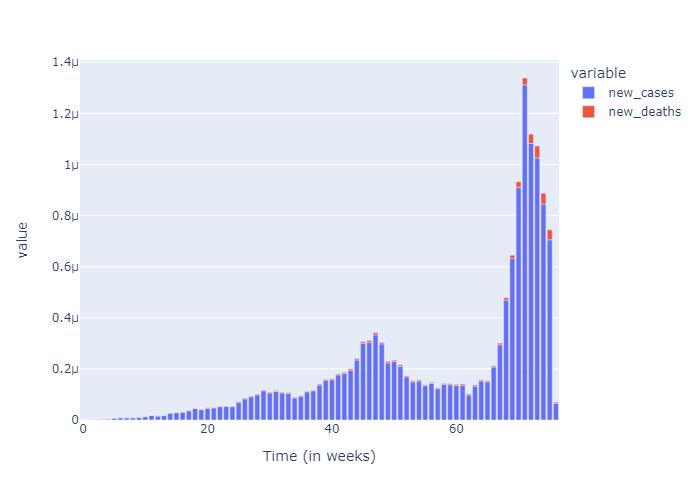

In [26]:
# Indonesia Plot
indonesia_weeks.index.names = ['Time (in weeks)']
fig = indonesia_weeks.plot(kind = 'bar')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Compared to the United States, which experienced a major increase in cases near the end of 2020 (most likely due to end of the year holidays), Indonesia experienced its major peak around the end of May 2021. After doing some research, this increase in cases could have been due to multiple factors. One of the factors could have been multiple national holidays occuring mid-May and June. Another factor could have been the rise of COVID variants, such as SARS, during this time period. The last factor could have been Indonesia's low vaccination rate. In June 2021, only 3.88% of Indonesia's population was vaccinated, while 65% of the United States population had received at least one dose of the vaccine.

## Nigeria Plot Analysis

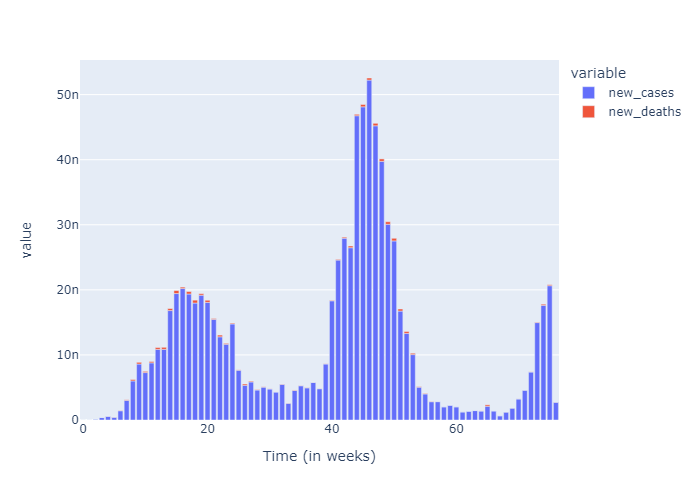

In [27]:
# Nigeria Plot
nigeria_weeks.index.names = ['Time (in weeks)']
fig = nigeria_weeks.plot(kind='bar')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

The new cases and deaths trends for Nigeria are very similar to those of the US for nearly the entirety of the timeframe we are considering with our data. The highest peak in Nigeria is during the week of Februrary 5th.This date is just over one month after New Years day which is the most celebrated holdiay in Nigeria, both the christian and muslim communities participate which could lead to higher transmission rates throughout both communities. This coincides to the peak in the US two weeks prior, the earlier onset in the US may be attributable to several holidays clustered days before New Years. The tail of the graph has another peak during the week of august 27. This is just a few weeks after Eid al-Adha, the second most popular celebration in Nigeria. The parallel in the US occurs on the same week and can likely be attributed to residuals from US independence day celebrations. The main difference in the two graphs would be from the start of the timeline until the week of august 7th. The US graph is bimodal during this timeframe while in the Nigerian graph it is unimodal. This may be due to lockdown measures differing in strictness between the two countries.The death rates were similar to the US graph throughout.

## Pakistan Plot Analysis

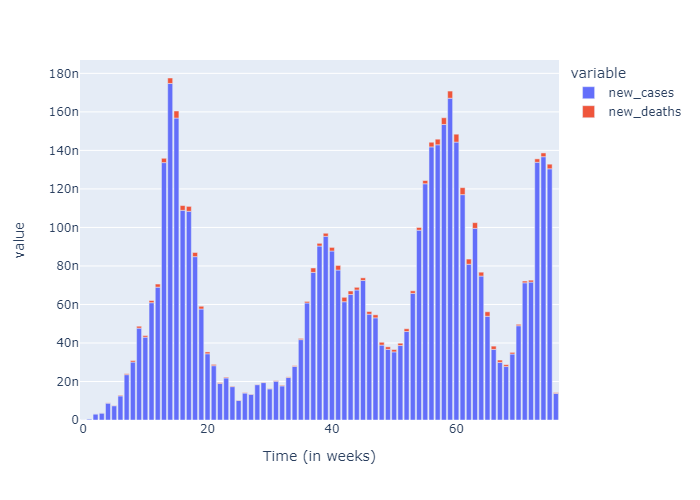

In [28]:
# Pakistan Plot
pakistan_weeks.index.names = ['Time (in weeks)']
fig = pakistan_weeks.plot(kind ='bar')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

When looking at the Pakistan case and deaths patterns compared to the US, it is easy to see that Pakistan has more peaks compared to the US. Meaning there were a constant higher amount of mean new cases in Pakistan compared to the United States. The peak dates are also different, as Pakistan most likeley does not observe or celebrate Christmas and new years like the US does, the cases around week 40 are not a high peak for the country. The highest peak in Pakistan occured during week 14 which is the week of June 8, 2020. Per research, Pakistan started to ease covid restrictions and end lockdowns throughout the country near the end of May, so that could be a possible explination for the rise in cases. There was also a peak around week 59, April 19, 2021. Pakistan recorded its first case of the delta variant around early May. So it could be likely that the variant was spreading mid April just not well documented or tested, resulting in a further wave of cases. Throughout the weeks we can note that Pakistan had more new deaths compared to the US. This could be a result of lower vaccination rates in the periods of low new cases. 